# Assignment: More Xarray with El Niño-Southern Oscillation (ENSO) Data

Here will will calculate the NINO 3.4 index of El Nino variabillity and use it to analyze datasets.

First read [this page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst). It tells you the following:

- The Niño 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle, also called the "climatology" has been removed.)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

### 1. Reproduce the SST curve from the figure below

Use the `sst.mnmean.nc` file that we worked with in class, located at <http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc>.

You don't have to match the stylistic details, or use different colors above and below zero, just the "3mth running mean" curve.

![enso](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

Load the data as an Xarray dataset. Drop the `time_bnds` variable as we did in class and trim the data to 1950 onward for this assignment.

In [2]:
fname = '/data9/GR6901/data/sst.mnmean.nc'
ds = xr.open_dataset(fname, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1950-01-01','2024-02-01'))
ds

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 890)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2024-03-03

Now calculate the climatology and the SST anomaly.

(array([34069.,  9081.,  8790.,  8285.,  7729.,  9048., 10550., 15152.,
        28295.,   857.]),
 array([-1.80000126,  1.68617606,  5.17235327,  8.65853024, 12.14470768,
        15.63088512, 19.11706161, 22.60323906, 26.0894165 , 29.57559395,
        33.06177139]),
 <BarContainer object of 10 artists>)

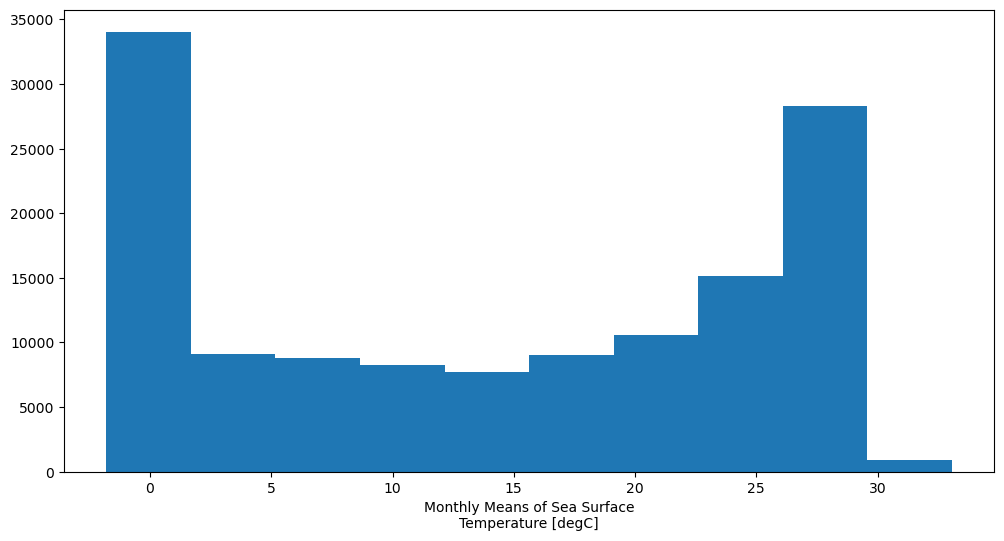

In [3]:
sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_clim.plot()

(array([2.000000e+00, 5.000000e+00, 7.800000e+01, 1.346000e+03,
        1.141780e+05, 9.312557e+06, 3.486140e+05, 2.493000e+03,
        4.100000e+01, 6.000000e+00]),
 array([-14.07865906, -11.55236244,  -9.02606678,  -6.49977064,
         -3.9734745 ,  -1.44717836,   1.07911777,   3.60541391,
          6.13171005,   8.65800667,  11.18430233]),
 <BarContainer object of 10 artists>)

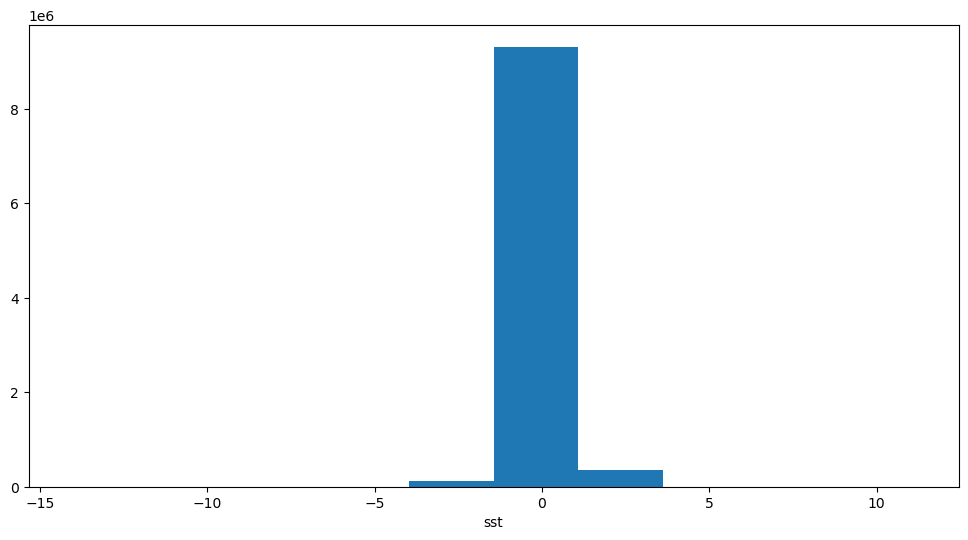

In [4]:
sst = ds.sst.groupby('time.month')
sst_anom = sst - sst_clim
sst_anom.plot()

Now reproduce the plot. Keep the rolling 3-month average of the SST anomaly as a DataArray for the next question.

sst_anom_nino34 = from sst_anom, select the lat  (5,-5) and lon=slice(360-170, 360-120). to get the mean, take the mean along the lat and lon dims. And then oni = sst_anom_nino34_mean with a rolling average with time=3, center=True

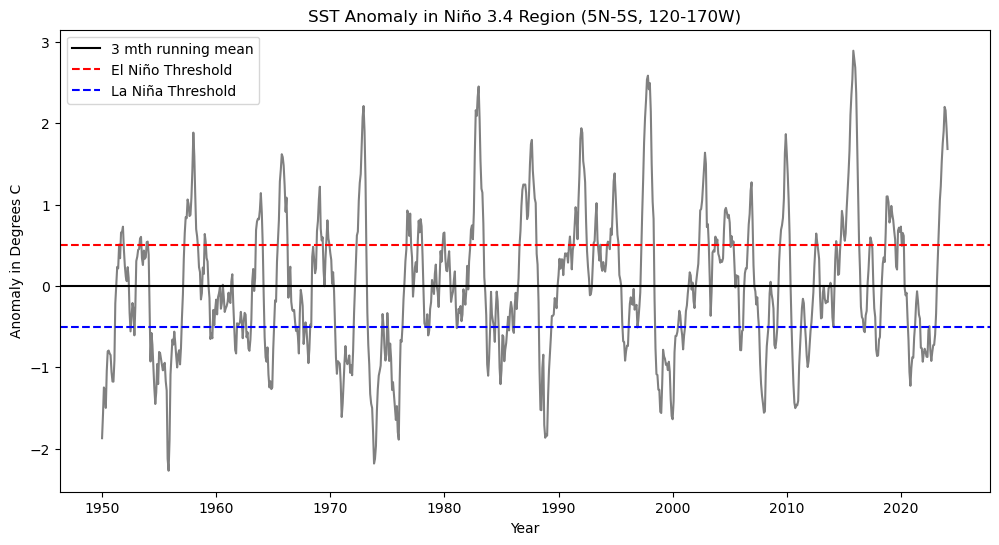

In [18]:
sst_anom_nino34 = sst_anom.sel(lat=slice(5,-5), lon=slice(360-170, 360-120)).mean('lat')
sst_anom_nino34 = sst_anom_nino34.mean('lon')
sst_anom_nino34.plot(color='grey')

plt.axhline(y=0, color='k', label='3 mth running mean')
plt.axhline(y=0.5, color='r',  linestyle='--', label='El Niño Threshold')
plt.axhline(y=-0.5, color='b',  linestyle='--', label='La Niña Threshold')

plt.title('SST Anomaly in Niño 3.4 Region (5N-5S, 120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend()
plt.show()

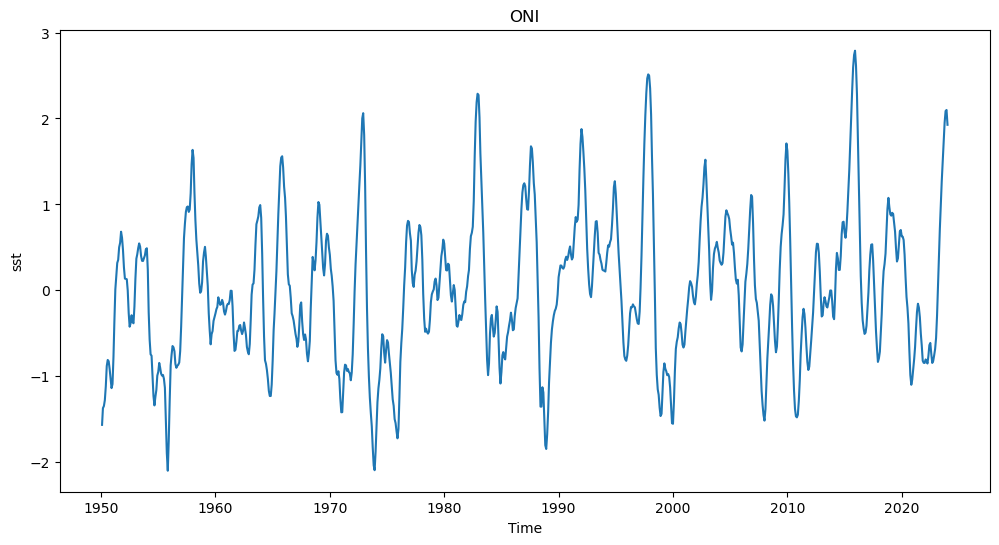

In [8]:
oni = sst_anom_nino34.rolling(time=3, center=True).mean()
oni.plot()
plt.title('ONI')
plt.show()

### 2. Calculate boolean timeseries representing the positive / negative ENSO phases

Refer to the definitions of warm/cold phases above.

In [83]:
sst_anom_nino34_warm = []
sst_anom_nino34_cold = []

In [84]:
for i in range(len(sst_anom_nino34)):
    if sst_anom_nino34[i] > 0.5:
        sst_anom_nino34_warm.append(sst_anom_nino34[i])
    else:
        sst_anom_nino34_warm.append(np.nan)

sst_anom_nino34_warm = np.array(sst_anom_nino34_warm)
#sst_anom_nino34_warm

In [85]:
for i in range(len(sst_anom_nino34)):
    if sst_anom_nino34[i] < 0.5:
        sst_anom_nino34_cold.append(sst_anom_nino34[i])
    else:
        sst_anom_nino34_cold.append(np.nan)

sst_anom_nino34_cold = np.array(sst_anom_nino34_cold)

Plot them somehow.

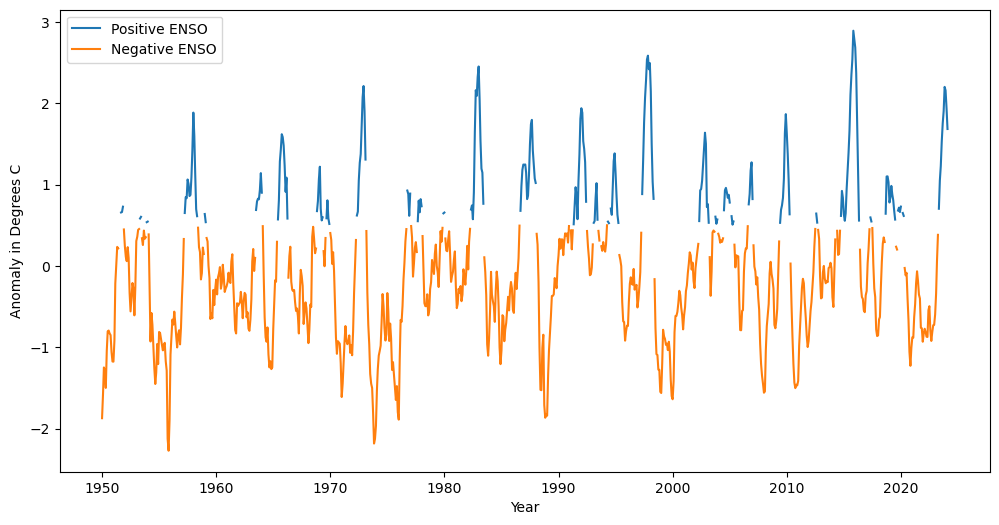

In [86]:
time = ds.time
time = np.array(time)
plt.plot(time, sst_anom_nino34_warm, label= 'Positive ENSO')
plt.plot(time, sst_anom_nino34_cold, label= 'Negative ENSO')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend()
plt.show()

### 3. Plot composites of SST anomaly for the positive and negative ENSO regimes

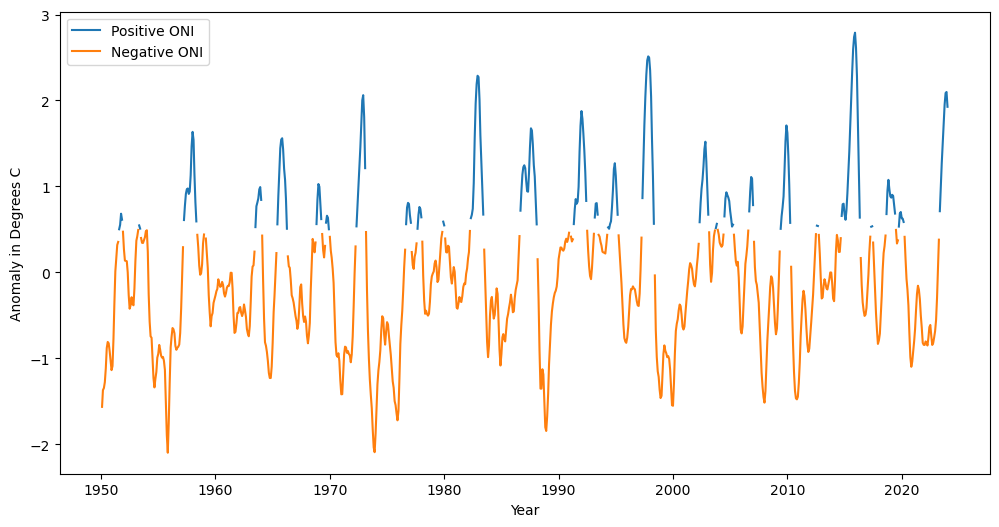

In [87]:
oni_pos = []
oni_neg = []

for i in range(len(oni)):
    if oni[i] > 0.5:
        oni_pos.append(oni[i])
    else:
        oni_pos.append(np.nan)

oni_pos = np.array(oni_pos)


for i in range(len(oni)):
    if oni[i] < 0.5:
        oni_neg.append(oni[i])
    else:
        oni_neg.append(np.nan)

oni_neg = np.array(oni_neg)


time = ds.time
time = np.array(time)
plt.plot(time, oni_pos, label= 'Positive ONI')
plt.plot(time, oni_neg, label= 'Negative ONI')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend()
plt.show()

These should be pcolormesh maps. First positive ONI.

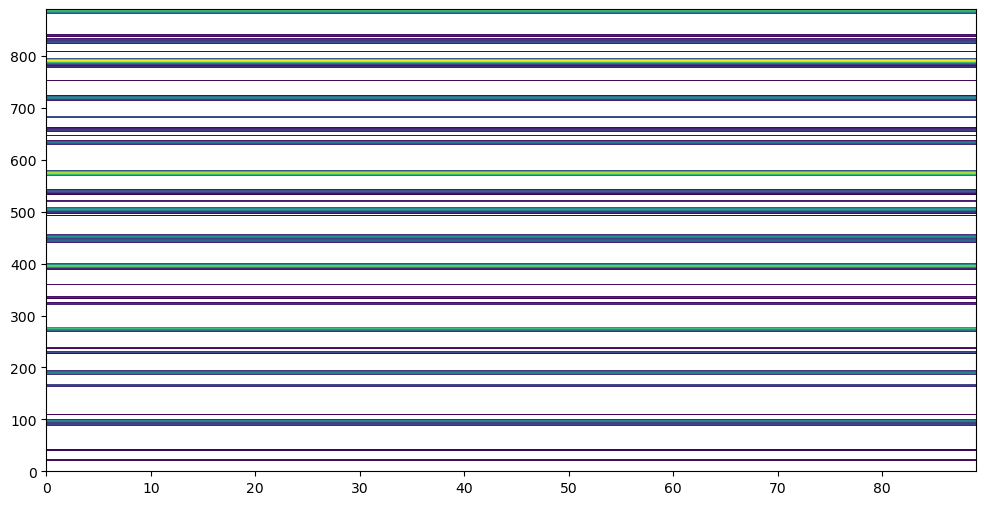

In [101]:
lat = ds.lat
lon = ds.lon

oni_pos_x, oni_pos_y = np.meshgrid(lat, oni_pos)
plt.pcolormesh(oni_pos_y)

And negative ONI.

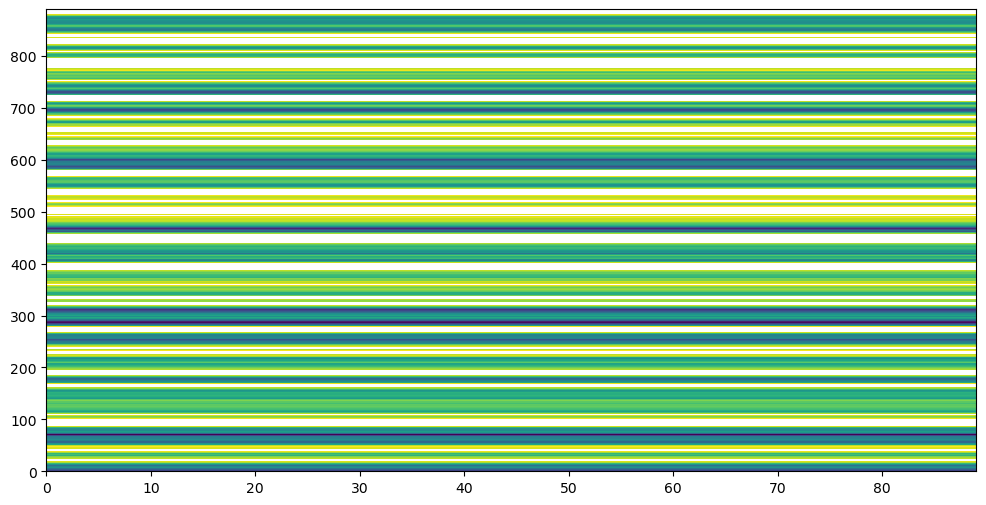

In [102]:
oni_neg_x, oni_neg_y = np.meshgrid(lat, oni_neg)
plt.pcolormesh(oni_neg_y)

### 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

First load the precip dataset. Code to fix the broken time coordinate is included.

In [103]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

<xarray.Dataset>
Dimensions:  (time: 356, Y: 72, X: 144)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1989-08-01
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    prcp     (time, Y, X) float32 nan nan nan nan ... 0.6489 0.6437 0.636 0.6303
Attributes:
    Conventions:  IRIDL

Now plot the difference between the time-mean of prcp during positive and negative ENSO phases.

In [115]:
len(dsp.prcp)

356

In [125]:
prcp_pos = []

for i in range(len(dsp.prcp)):
    if sst_anom_nino34[i] > 0.5:
        prcp_pos.append(dsp.prcp[i])
    else:
        prcp_pos.append(np.nan)



prcp_neg = []

for i in range(len(dsp.prcp)):
    if sst_anom_nino34[i] < 0.5:
        prcp_neg.append(dsp.prcp[i])
    else:
        prcp_neg.append(np.nan)


In [ ]:
prcp_pos_mean = prcp_pos.prcp.groupby('time.month').mean(dim='time')
prcp_neg_mean = prcp_neg.prcp.groupby('time.month').mean(dim='time')

prcp_diff = prcp_pos_mean - prcp_neg_mean

time = dsp.time
plt.plot(time,prcp_diff)